In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas import json_normalize

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/industrial_betlogs.json', 'r') as f:
      json_data = json.load(f)

In [ ]:
# Extract nested keys directly
df = pd.json_normalize(json_data, 'bet', ['time', 'userid'])
#
df['match_id'] = df['pick'].apply(lambda x: x[0]['match']['id'])
df['match_dateofmatch'] = df['pick'].apply(lambda x: x[0]['match']['dateofmatch'])
df['match_home'] = df['pick'].apply(lambda x: x[0]['match']['home'])
df['match_homeId'] = df['pick'].apply(lambda x: x[0]['match']['homeId'])
df['match_away'] = df['pick'].apply(lambda x: x[0]['match']['away'])
df['match_awayId'] = df['pick'].apply(lambda x: x[0]['match']['awayId'])
df['match_sport'] = df['pick'].apply(lambda x: x[0]['match']['sport'])
df['match_category'] = df['pick'].apply(lambda x: x[0]['match']['category'])
df['match_tournament'] = df['pick'].apply(lambda x: x[0]['match']['tournament'])
df['match_sportId'] = df['pick'].apply(lambda x: x[0]['match']['sportId'])
df['match_categoryId'] = df['pick'].apply(lambda x: x[0]['match']['categoryId'])
df['match_tournamentId'] = df['pick'].apply(lambda x: x[0]['match']['tournamentId'])
df['market_freetext'] = df['pick'].apply(lambda x: x[0]['market']['freetext'])
df['market_specialoddsvalue'] = df['pick'].apply(lambda x: x[0]['market']['specialoddsvalue'])
df['market_typeid'] = df['pick'].apply(lambda x: x[0]['market']['typeid'])
df['oddField_oddTypeId'] = df['pick'].apply(lambda x: x[0]['oddField']['oddTypeId'])
df['oddField_type'] = df['pick'].apply(lambda x: x[0]['oddField']['type'])
df['oddField_value'] = df['pick'].apply(lambda x: x[0]['oddField']['value'])

# Drop the 'pick' column
df.drop(['pick'], axis=1, inplace=True)

print(df)

      stake                     time userid  match_id     match_dateofmatch  \
0      25.0  2024-04-10 00:00:18.935  20592   7523432  2024-04-09T22:30:00Z   
1     200.0  2024-04-10 00:00:56.856  20592   7513804  2024-04-09T23:00:00Z   
2       5.0  2024-04-10 00:01:38.490  39897   7496089  2024-04-10T00:00:00Z   
3      50.0  2024-04-10 00:01:42.570  40757   7402945  2024-04-09T23:00:00Z   
4      13.3  2024-04-10 00:02:04.462  64865   7408958  2024-04-10T02:00:00Z   
...     ...                      ...    ...       ...                   ...   
9995   30.0  2024-04-17 20:00:47.677  64865   7527188  2024-04-17T19:00:00Z   
9996    2.0  2024-04-17 20:00:49.711  23637   7555301  2024-04-17T19:30:00Z   
9997   10.0  2024-04-17 20:01:19.161   8526   7527187  2024-04-17T19:00:00Z   
9998   10.0  2024-04-17 20:01:22.732  33058   7529939  2024-04-17T19:15:00Z   
9999   10.0  2024-04-17 20:02:41.010  68058   7561889  2024-04-17T18:45:00Z   

              match_home  match_homeId             

In [ ]:
df.head()

,stake,time,userid,match_id,match_dateofmatch,match_home,match_homeId,match_away,match_awayId,match_sport,...,match_tournament,match_sportId,match_categoryId,match_tournamentId,market_freetext,market_specialoddsvalue,market_typeid,oddField_oddTypeId,oddField_type,oddField_value
0,25.0,2024-04-10 00:00:18.935,20592,7523432,2024-04-09T22:30:00Z,FC Brakna,669099,Nouakchott Academie,1094379,Soccer,...,Super D2,1,567,10080989,1x2,None,1,2,draw,1.909
1,200.0,2024-04-10 00:00:56.856,20592,7513804,2024-04-09T23:00:00Z,USA,7424,Canada,7412,Soccer,...,"SheBelieves Cup, Women",1,4,2505,1x2,None,1,3,{$competitor2},1.727
2,5.0,2024-04-10 00:01:38.490,39897,7496089,2024-04-10T00:00:00Z,Fluminense RJ,1961,Colo Colo,3155,Soccer,...,Copa Libertadores,1,393,384,"1st half - total ({""total"": ""1.5""})","{""total"": ""1.5""}",68,12,over {total},3.400
3,50.0,2024-04-10 00:01:42.570,40757,7402945,2024-04-09T23:00:00Z,Detroit Red Wings,3685,Washington Capitals,3691,Ice Hockey,...,NHL,4,37,234,"{!periodnr} period - {$competitor1} total ({""t...","{""total"": ""0.5"", ""periodnr"": ""2""}",447,12,over {total},1.500
4,13.3,2024-04-10 00:02:04.462,64865,7408958,2024-04-10T02:00:00Z,Los Angeles Lakers,3427,Golden State Warriors,3428,Basketball,...,NBA,2,15,132,Winner (incl. overtime),None,219,5,{$competitor2},2.270


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stake                    10000 non-null  float64
 1   time                     10000 non-null  object 
 2   userid                   10000 non-null  object 
 3   match_id                 10000 non-null  int64  
 4   match_dateofmatch        10000 non-null  object 
 5   match_home               10000 non-null  object 
 6   match_homeId             10000 non-null  int64  
 7   match_away               10000 non-null  object 
 8   match_awayId             10000 non-null  int64  
 9   match_sport              10000 non-null  object 
 10  match_category           10000 non-null  object 
 11  match_tournament         10000 non-null  object 
 12  match_sportId            10000 non-null  int64  
 13  match_categoryId         10000 non-null  int64  
 14  match_tournamentId     

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['match_dateofmatch'] = pd.to_datetime(df['match_dateofmatch'])

In [ ]:
# missing values in market_specialoddsvalue

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   stake                    10000 non-null  float64            
 1   time                     10000 non-null  datetime64[ns]     
 2   userid                   10000 non-null  object             
 3   match_id                 10000 non-null  int64              
 4   match_dateofmatch        10000 non-null  datetime64[ns, UTC]
 5   match_home               10000 non-null  object             
 6   match_homeId             10000 non-null  int64              
 7   match_away               10000 non-null  object             
 8   match_awayId             10000 non-null  int64              
 9   match_sport              10000 non-null  object             
 10  match_category           10000 non-null  object             
 11  match_tournament         1000

In [ ]:
df['userid'].nunique()

550

In [ ]:
df['match_category'].value_counts()

match_category
Portugal                   1093
International Clubs        1051
England                     551
International               504
USA                         405
                           ... 
Riot LoL                      1
Simulated Reality Women       1
European Pro League           1
Botswana                      1
Chinese Taipei                1
Name: count, Length: 152, dtype: int64

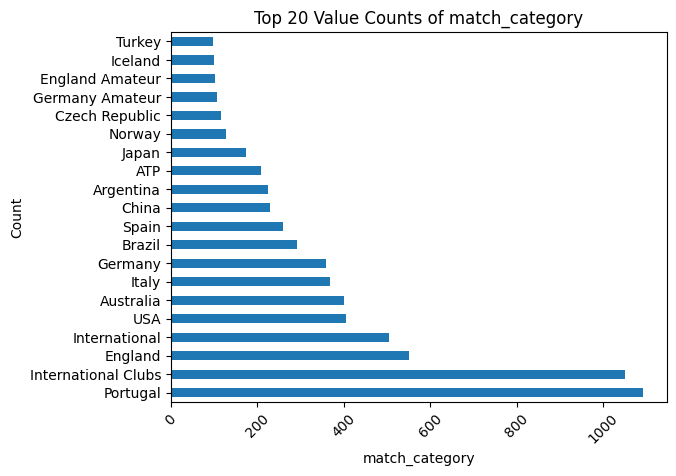

In [ ]:
df['match_category'].value_counts().head(20).plot(kind='barh')

# Adding title and labels
plt.title('Top 20 Value Counts of match_category')
plt.xlabel('match_category')
plt.ylabel('Count')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

In [ ]:
df['match_tournament'].value_counts()

match_tournament
Liga Portugal            717
Premier League           582
UEFA Champions League    442
TT Elite Series          295
Serie A                  293
                        ... 
National A                 1
National 1                 1
European Pro League        1
Ykkosliiga                 1
DEL                        1
Name: count, Length: 626, dtype: int64

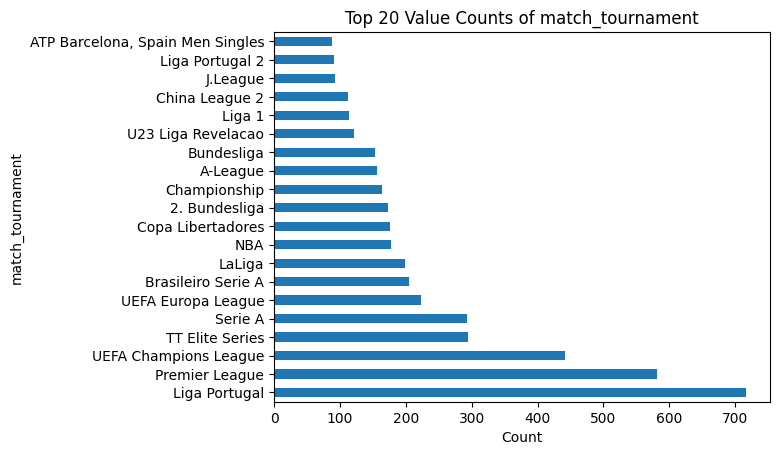

In [ ]:
df['match_tournament'].value_counts().head(20).plot(kind='barh')

# Adding title and labels
plt.title('Top 20 Value Counts of match_tournament')
plt.ylabel('match_tournament')
plt.xlabel('Count')

# Displaying the plot
plt.show()

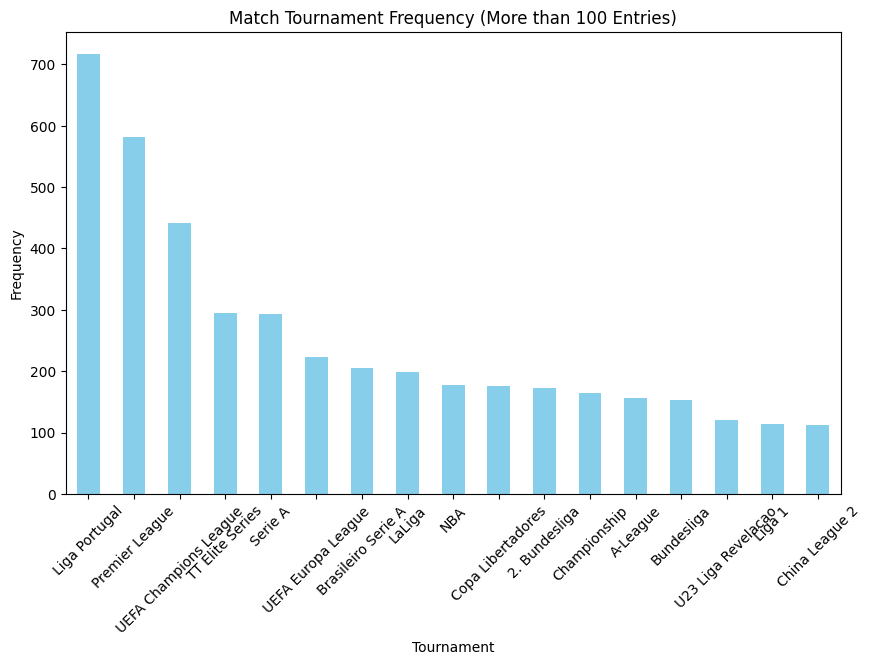

In [ ]:
# Calculate Value Counts and filter for those greater than 100
tournament_counts = df['match_tournament'].value_counts()
filtered_tournament_counts = tournament_counts[tournament_counts > 100]

# Plotting the filtered data
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
filtered_tournament_counts.plot(kind='bar', color='skyblue')  # Create a bar plot
plt.title('Match Tournament Frequency (More than 100 Entries)')  # Add a title to the plot
plt.xlabel('Tournament')  # Add an x-label
plt.ylabel('Frequency')  # Add a y-label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

In [ ]:
df['match_sport'].value_counts()

match_sport
Soccer               8192
Basketball            533
Table Tennis          405
Tennis                352
Volleyball            184
Ice Hockey            135
Handball              101
Baseball               24
Futsal                 23
Counter-Strike         16
Rugby                  10
Badminton               9
Beach Volley            6
MMA                     4
Dota 2                  1
Call of Duty            1
Cricket                 1
Squash                  1
Darts                   1
League of Legends       1
Name: count, dtype: int64

In [ ]:
df['match_home'].value_counts()

match_home
FC Porto               191
Benfica Lisbon         184
Liverpool FC           137
Paris Saint-Germain    121
Gil Vicente FC         113
                      ... 
Hviti Riddarinn          1
Ereliai Mazeikiai        1
Marbella FC              1
ND Ilirija 1911          1
Sao Paulo FC SP          1
Name: count, Length: 2220, dtype: int64

In [ ]:
df['stake'].agg(['mean', 'median', 'min', 'max', 'sum'])

mean          42.755695
median        10.000000
min            0.100000
max         5800.000000
sum       427556.950000
Name: stake, dtype: float64

In [ ]:
df.groupby('userid')['stake'].agg(['mean', 'median', 'min', 'max', 'count', 'sum'])
#find which users were mostly betting ona specific team or betting type or sport type

,mean,median,min,max,count,sum
userid,,,,,,
40,50.000000,50.0,50.0,50.0,1,50.00
211,23.866452,15.0,1.0,65.0,31,739.86
313,45.018182,35.0,6.0,130.0,22,990.40
320,62.400000,50.0,7.0,145.0,5,312.00
395,18.679312,15.0,1.0,155.0,189,3530.39
...,...,...,...,...,...,...
68056,6.507647,5.0,2.0,20.0,17,110.63
68058,16.593548,19.0,4.2,32.0,31,514.40
68060,137.500000,137.5,25.0,250.0,2,275.00


In [ ]:
#filter those players who have the maximum number of bets, do not keep 1 or 2 bets

In [ ]:
#user_bet_counts = df_multiple_bets.groupby('userid')['stake'].count()

# Filtering users with more than one bet
#users_with_multiple_bets = user_bet_counts[user_bet_counts > 1]

# Counting the number of users with more than one bet
# num_users_with_multiple_bets = len(users_with_multiple_bets)


In [ ]:
#users_with_multiple_bets_ids = users_with_multiple_bets.index.tolist()

#df_multiple_bets = df[df['userid'].isin(users_with_multiple_bets_ids)]
#df_multiple_bets

In [ ]:
df['userid'].nunique()

550

In [ ]:
df.groupby('match_sport')['stake'].agg(['sum', 'count', 'median'])
# find out bet size, number of bets and the median of bet

,sum,count,median
match_sport,,,
Badminton,113.20,9,2.00
Baseball,606.50,24,15.00
Basketball,30231.98,533,12.00
Beach Volley,70.05,6,9.00
Call of Duty,5.40,1,5.40
Counter-Strike,376.95,16,9.85
Cricket,15.00,1,15.00
Darts,50.00,1,50.00
Dota 2,235.00,1,235.00


In [ ]:
df.groupby('match_home')['stake'].agg(['sum', 'count', 'median'])

,sum,count,median
match_home,,,
1 FC Nuremberg,1.00,1,1.00
1 FC Nuremberg II,10.00,1,10.00
1. FC Magdeburg,133.50,6,5.25
1. FC Saarbrucken,2113.40,16,10.00
1. FSV Mainz 05,223.00,9,10.00
...,...,...,...
Znk Msm Ptuj,22.10,1,22.10
"Zochniak, Jakub",143.81,11,12.50
Zurich Lions,1.00,1,1.00


In [ ]:
df.groupby('match_away')['stake'].agg(['sum', 'count', 'median'])

,sum,count,median
match_away,,,
07 Vestur Sorvagur,6.00,2,3.0
1 FC Cologne,745.75,24,5.0
1 FC Germ Egestorf/Langreder,75.00,2,37.5
1 FC Kaiserslautern,1477.75,51,10.0
1 FC Kleve,7.50,1,7.5
...,...,...,...
"Zochniak, Jakub",44.97,4,12.0
Zweigen Kanazawa,10.00,1,10.0
"de Minaur, Alex",98.60,11,7.0


In [ ]:
df.groupby('match_tournament')['stake'].agg(['sum', 'count', 'median'])

,sum,count,median
match_tournament,,,
1 Division,3.00,1,3.00
1 Lyga,147.10,4,31.00
1. A SKL,15.00,1,15.00
1. CFL,10.00,1,10.00
1. Division,802.62,18,44.50
...,...,...,...
"World Championship, Women",663.20,17,48.10
"World Championships, Women, Div II, Group A",93.50,2,46.75
World Cup,94.80,10,7.50


<Axes: xlabel='stake', ylabel='match_sport'>

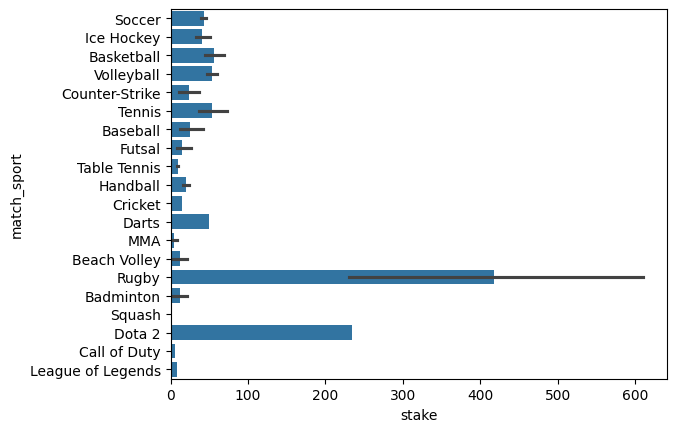

In [ ]:
sns.barplot(df, y = 'match_sport', x = 'stake')

In [ ]:
df['market_specialoddsvalue'].value_counts()
# people mostly bets on more than 0.5 goals

market_specialoddsvalue
{"total": "0.5"}                                   1109
{"total": "1.5"}                                    969
{"total": "2.5"}                                    723
{"total": "3.5"}                                    442
{"total": "4.5"}                                    310
                                                   ... 
{"variant": "pre:playerprops:43067599:608110"}        1
{"total": "51.5", "quarternr": "1"}                   1
{"variant": "pre:playerprops:43067581:1168380"}       1
{"variant": "pre:playerprops:43067593:1829762"}       1
{"hcp": "0:11"}                                       1
Name: count, Length: 620, dtype: int64

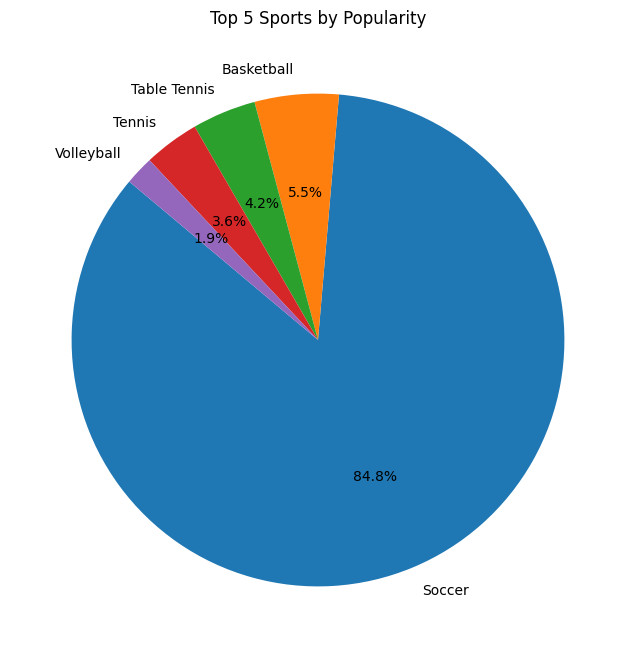

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each sport and filter the top 5
top_sports = df['match_sport'].value_counts().nlargest(5)

# Setting up the plot data
labels = top_sports.index
sizes = top_sports.values

# Creating the pie chart for the top 5 sports
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Sports by Popularity')
plt.show()

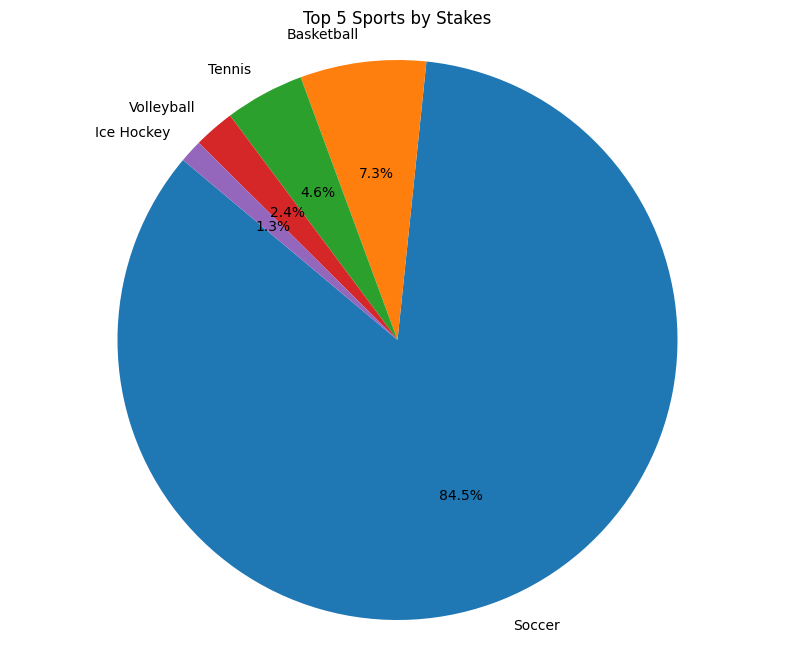

In [ ]:
import matplotlib.pyplot as plt

# Group data by 'match_sport' and sum 'stake'
grouped_stakes = df.groupby('match_sport')['stake'].sum()

# Get the top 5 sports by total stakes
top_stakes = grouped_stakes.nlargest(5)

# Setup for plotting
labels = top_stakes.index
sizes = top_stakes.values

# Plotting the pie chart for the top 5 sports by stakes
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Sports by Stakes')
plt.axis('equal')  # Maintains the circle shape
plt.show()

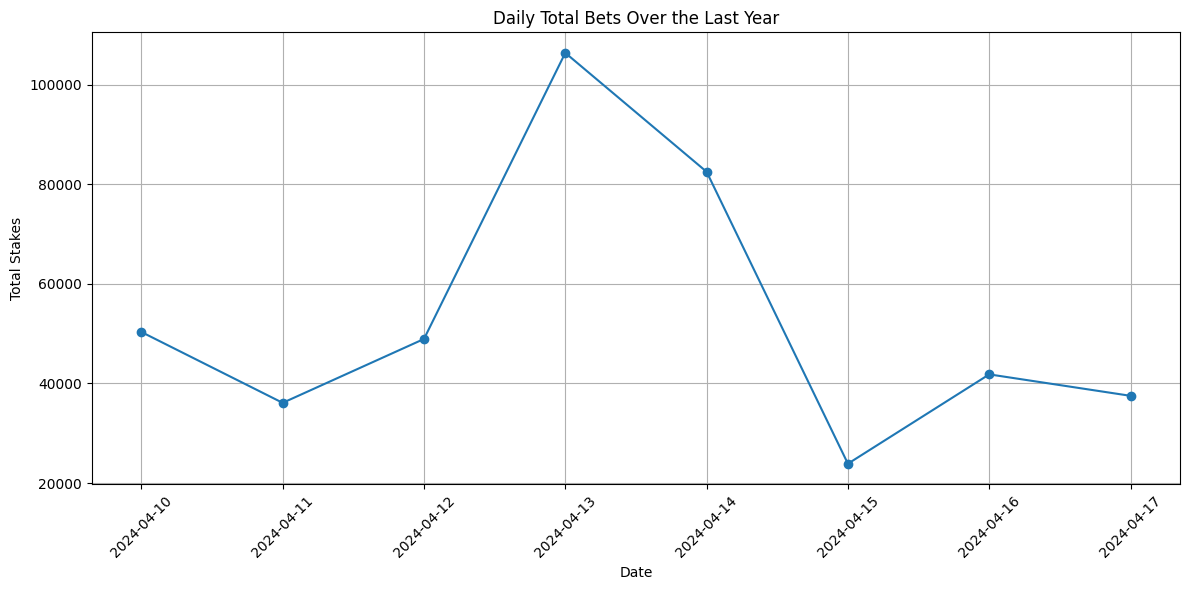

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'time' column to datetime format accounting for milliseconds
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f')

# Determine the latest date and compute one year ago from that
latest_date = df['time'].max()
one_year_ago = latest_date - pd.DateOffset(years=1)

# Filter the dataframe to only include data from the last year
filtered_df = df[df['time'] >= one_year_ago]

# Aggregate stakes by day
daily_bets = filtered_df.groupby(filtered_df['time'].dt.floor('d'))['stake'].sum()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(daily_bets.index, daily_bets.values, marker='o', linestyle='-')
plt.title('Daily Total Bets Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Total Stakes')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()



In [ ]:
earliest_record = df['time'].min()
earliest_record

Timestamp('2024-04-10 00:00:18.935000')

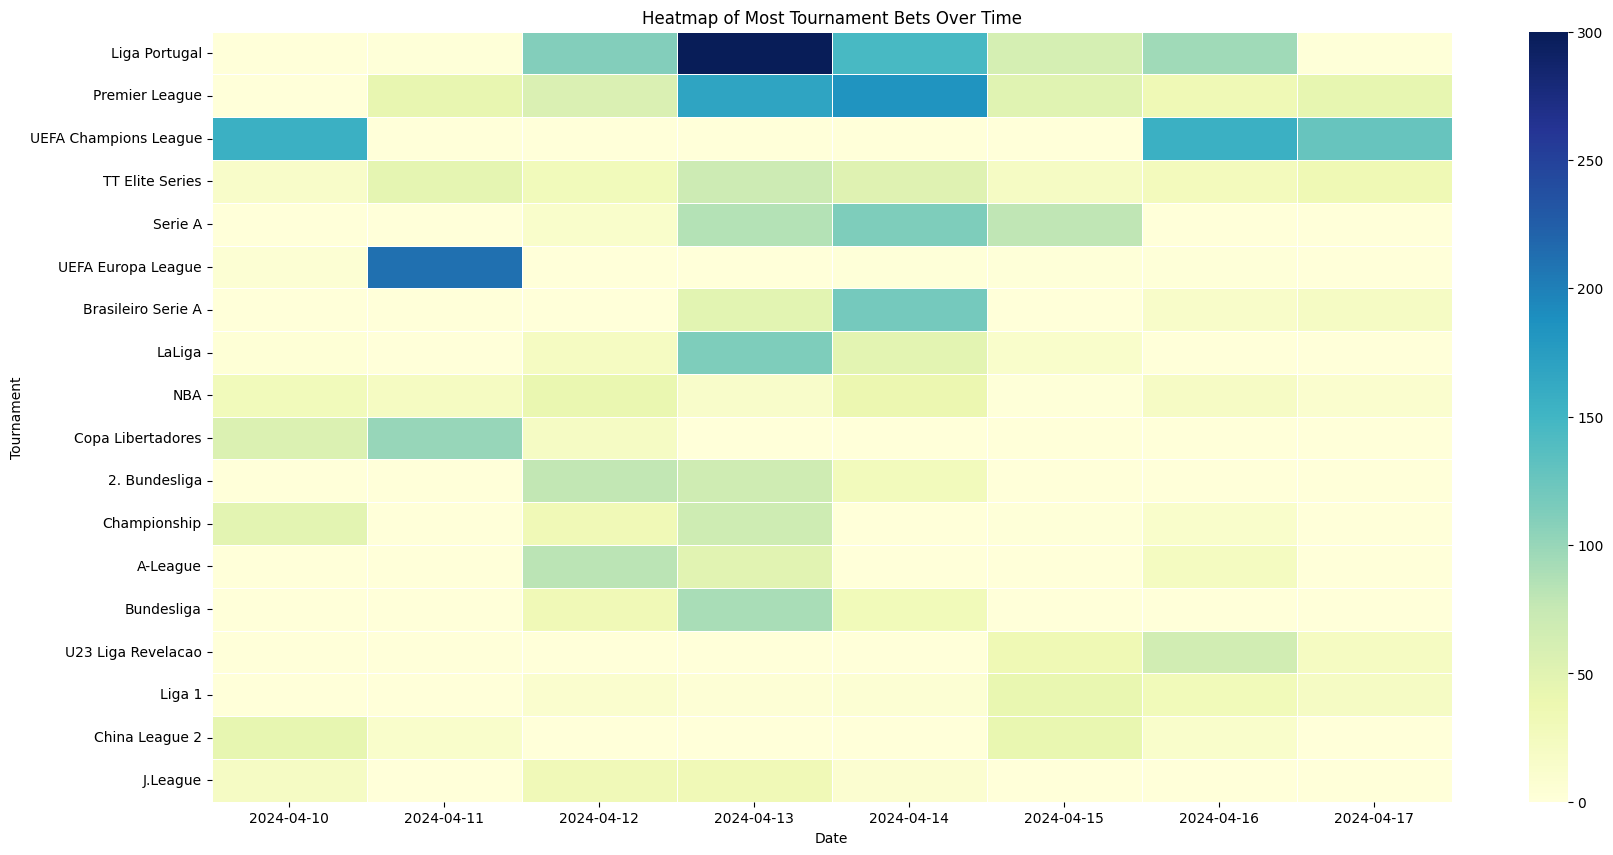

In [ ]:
contingency_table_sport = pd.crosstab(df['match_sport'], df['date'])
contingency_table_tournament = pd.crosstab(df['match_tournament'], df['date'])


# Filter for the top 20% of tournaments based on overall frequency
top_tournaments = contingency_table_tournament.sum(axis=1).nlargest(int(len(contingency_table_tournament) * 0.03))
filtered_table_tournament = contingency_table_tournament.loc[top_tournaments.index]


# Plotting the heatmap for the top 20% 'match_tournament'
plt.figure(figsize=(20, 10))  # Adjust the size as needed
sns.heatmap(filtered_table_tournament, cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Most Tournament Bets Over Time')
plt.xlabel('Date')
plt.ylabel('Tournament')
plt.show()

        match_tournament  NumberOfBets
0          Liga Portugal           717
1         Premier League           582
2  UEFA Champions League           442
3        TT Elite Series           295
4                Serie A           293
5     UEFA Europa League           223
6     Brasileiro Serie A           205
7                 LaLiga           199
8                    NBA           178
9      Copa Libertadores           176


<ipython-input-98-36a35ed10661>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumberOfBets', y='match_tournament', data=tournament_counts.head(10), palette='magma')  # Using the top 10 for clarity


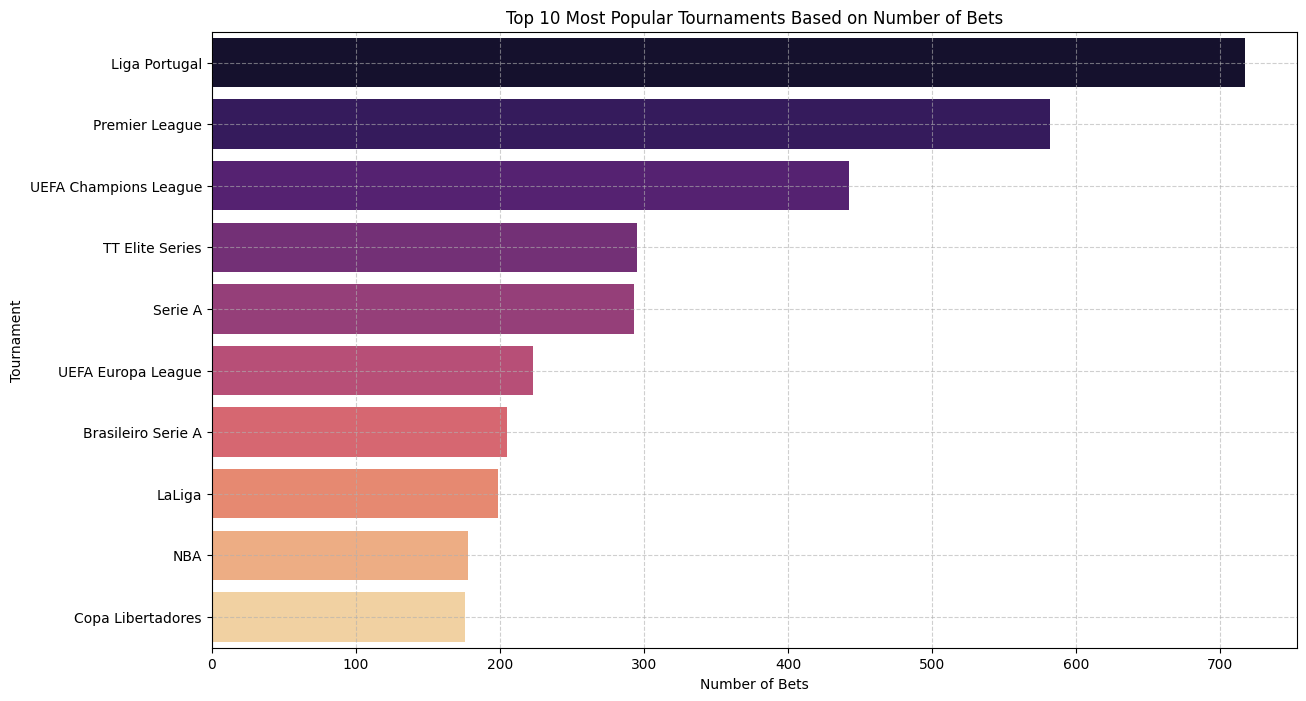

In [ ]:
# Count the number of bets per tournament
tournament_counts = df['match_tournament'].value_counts().reset_index()
tournament_counts.columns = ['match_tournament', 'NumberOfBets']

# Display the top tournaments
print(tournament_counts.head(10))

# Sorting data for better visualization
tournament_counts = tournament_counts.sort_values(by='NumberOfBets', ascending=False)

# Create a bar chart for the top 10 most popular tournaments
plt.figure(figsize=(14, 8))
sns.barplot(x='NumberOfBets', y='match_tournament', data=tournament_counts.head(10), palette='magma')  # Using the top 10 for clarity
plt.title('Top 10 Most Popular Tournaments Based on Number of Bets')
plt.xlabel('Number of Bets')
plt.ylabel('Tournament')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()